In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import cv2 as cv 

from keras.layers import (Conv2D, Input, LeakyReLU, Dense, Activation, Flatten,
                          Dropout, MaxPool2D)
from keras import models 
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import ReduceLROnPlateau 

import pickle 

%matplotlib inline 

In [2]:
np.random.seed(1) 
df_train = pd.read_csv("train.csv") #load training data 
df_train = df_train.iloc[np.random.permutation(len(df_train))] #randomize data 

In [3]:
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(42000, 785)

In [8]:
sample_size = df_train.shape[0] #Training set size 
validation_size = int(df_train.shape[0]*0.1) #Validation set (10% data)

train_x = np.asarray(df_train.iloc[:sample_size-validation_size:,1:]).reshape([sample_size-validation_size,28,28,1]) #input columns
train_y = np.asarray(df_train.iloc[:sample_size-validation_size,0]).reshape([sample_size-validation_size,1]) #desired output column(column 0)

val_x = np.asarray(df_train.iloc[sample_size-validation_size:,1:]).reshape([validation_size,28,28,1])
val_y = np.asarray(df_train.iloc[sample_size-validation_size:,0]).reshape([validation_size,1])


In [9]:
train_x.shape,train_y.shape #shape of training set 

((37800, 28, 28, 1), (37800, 1))

In [10]:
df_test = pd.read_csv("test.csv") #load test data
test_x = np.asarray(df_test.iloc[:,:]).reshape([-1,28,28,1]) #data into numpy array and reshape

In [11]:
#normalize data 
#divide by max pixel value range
train_x = train_x/255
val_x = val_x/255
test_x = test_x/255

<function matplotlib.pyplot.show(close=None, block=None)>

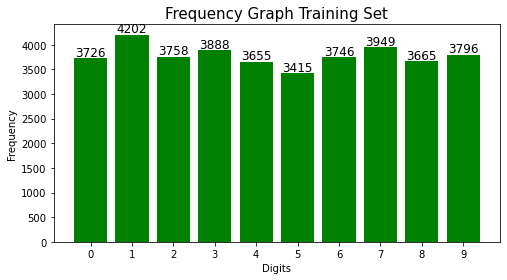

In [13]:
#frequency check training set 
counts = df_train.iloc[:sample_size-validation_size,:].groupby('label')['label'].count()
f = plt.figure(figsize=(8,4))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8, color = "green")
for i in counts.index: 
    plt.text(i,counts.values[i]+50,str(counts.values[i]),horizontalalignment='center',fontsize=12)
    
plt.tick_params(labelsize = 10)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)
plt.title("Frequency Graph Training Set", fontsize = 15)
plt.savefig('digit_freq_train.png')
plt.show

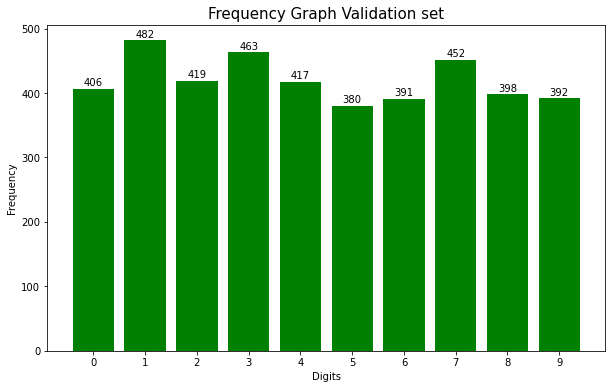

In [16]:
#frequency check validation set 
counts = df_train.iloc[sample_size-validation_size:,:].groupby('label')['label'].count()

f = plt.figure(figsize=(10,6))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8, color = "green")
for i in counts.index: 
    plt.text(i,counts.values[i]+5,str(counts.values[i]),horizontalalignment='center',fontsize = 10)

plt.tick_params(labelsize=10)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)
plt.title("Frequency Graph Validation set", fontsize = 15)
plt.savefig('digit_freq_validation.png')
plt.show()


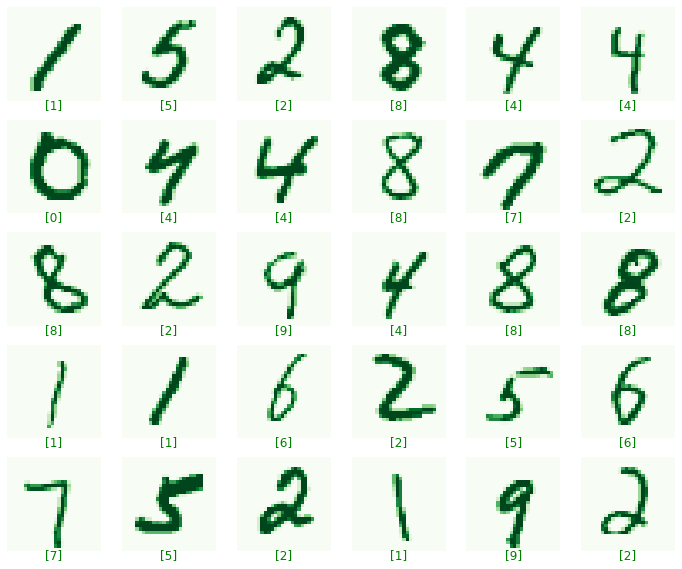

In [19]:
#visualize first 30 images w/ labels
rows = 5 
cols = 6

f = plt.figure(figsize = (2*cols,2*rows)) #define figure

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) 
    plt.imshow(train_x[i].reshape([28,28]),cmap = "Greens")
    plt.axis("off")
    plt.title(str(train_y[i]), y = -0.15, color = "green")
    
plt.savefig("digit_visual.png")
